In [1]:
import pandas as pd

aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [2]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

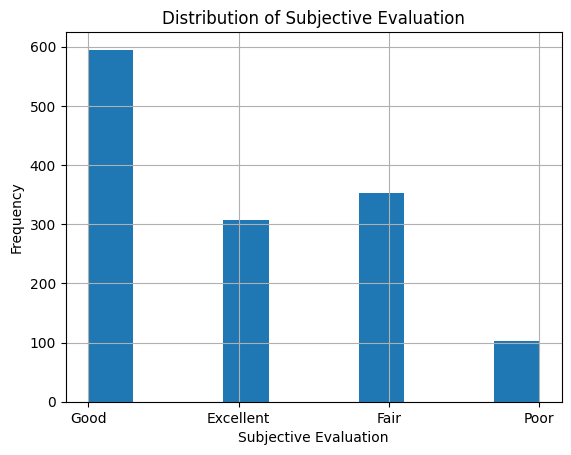

In [3]:
from matplotlib import pyplot as plt


aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [4]:
from scorecard import Scorecard

scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML', 
                use_sbc=True)

SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

ValueError: object of too small depth for desired array